# Ejercicio k-Nearest Neighbor

## App Reviews

### Importamos las librerías que vamos a utilizar

(Ojo separador!)

In [1]:
import pandas as pd
import numpy as np

# Leemos nuestro archivo de entrada

In [5]:
df = pd.read_csv('./reviews_sentiment.csv', sep=';')
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis

In [7]:
features = ['wordcount', 'sentimentValue']
target = ['Star Rating']



In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df[target], test_size=.2, random_state=42)

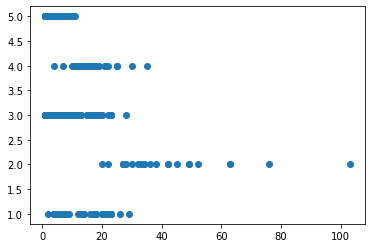

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['wordcount'], df[target]);

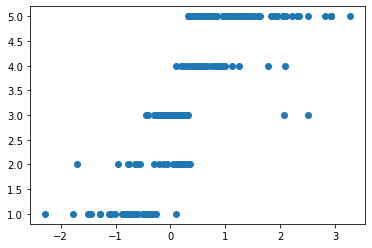

In [12]:
plt.scatter(df['sentimentValue'], df[target]);

## Preparamos el dataset - escalado

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_scaled.head()

,wordcount,sentimentValue
0,-0.561337,-0.755392
1,-0.249905,0.284492
2,0.840107,-0.399836
3,1.774402,-0.213742
4,-0.249905,-0.585104


## Creamos el Modelo

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_scaled, y_train)

<ipython-input-30-43d7781c412d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [31]:
X_scaled.shape

(205, 2)

## Resultados obtenidos

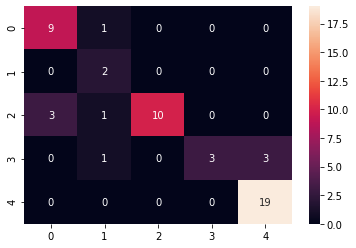

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(scaler.transform(X_test))

conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True);



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8269230769230769

## ¿Cómo obtener el mejor valor de k?

In [45]:
from sklearn.model_selection import GridSearchCV

# define model
model = KNeighborsClassifier()
# define model evaluation method

# define grid
grid = dict()
grid['n_neighbors'] = list(np.arange(1,15,2))
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=10, n_jobs=-1)
# perform the search
results = search.fit(scaler.transform(X_train), y_train)

# summarize
print('Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Accuracy: 0.873
Config: {'n_neighbors': 7}


C:\Users\diego\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

<ipython-input-46-a67a41059d16>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_scaled, y_train)


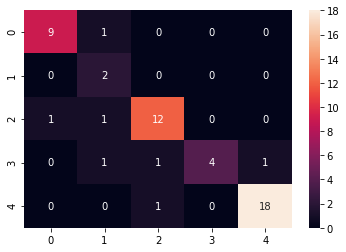

In [46]:
# Primero se define el modelo con los parametros con mejor resultado del gridsearch

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_scaled, y_train)


predictions = 
model.predict(scaler.transform(X_test))
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(pd.DataFrame(conf_matrix), annot=True);

In [48]:
df[features].head()

,wordcount,sentimentValue
0,23,-0.486389
1,20,-0.586187
2,4,-0.602240
3,17,-0.616271
4,6,-0.651784


In [56]:
model.predict(scaler.transform(pd.DataFrame(np.array([[5,1]]), columns=['wordcount', 'sentimentValue'])))

array([2], dtype=int64)